# Introduction to Computer Vision

## Computer Vision Techniques

<li>Object Recognition, Identification, and Detection</li>
<li>Semantic Segmentation</li>
<li>Feature Extraction</li>
<li>Content Based Image Retrieval</li>
<li>Pose Estimation</li>
<li>Optical Character Recognition</li>
<li>Facial Recognition</li>
<li>Shape Recognition Technology</li>
<li>Motion Estimation</li>
<li>Image Restoration</li>

## Installation and Setup Tips

Required packages are skimage, jupyter, numpy, matplotlib, and scipy (included in skimage).

When using Python, it is highly recommended to use Virtual Environments. To setup a new virtual environment with Python 3, you can issue to following command via the command line:

`python -m venv virtual_environment_name`

where `virtual_environment_name` is whatever name of the virtual environment you desire. You then want to `activate` the virtual environment by issuing the command:

`source virtual_environment_name/bin/activate`

This now switches your python environment to the `virtual_environment_name` environment. You can easily install packages into this environment via:

`pip install skimage`

`pip install jupyter`

`pip install numpy`

`pip install matplotlib`

To start jupyter, issue the following command:

`jupyter notebook`

## Import Packages

![python-scistack](https://fabienmaussion.info/acinn_python_workshop/figures/scipy_ecosystem.png)

In [499]:
import skimage
import numpy as np

from matplotlib import pyplot
from scipy.ndimage.filters import convolve

## Loading Images

In [500]:
image = skimage.io.imread("images/test_image.png")

In [501]:
image

array([[[117, 107,  56],
        [ 68,  57,  37],
        [108,  92,  53],
        ...,
        [ 94,  92,  58],
        [134, 130,  85],
        [143, 155, 104]],

       [[108,  92,  53],
        [ 84,  77,  45],
        [ 84,  77,  45],
        ...,
        [105, 128,  89],
        [ 94,  91,  75],
        [ 70,  78,  54]],

       [[117, 107,  56],
        [117, 107,  56],
        [ 84,  77,  45],
        ...,
        [ 95, 103,  62],
        [ 72,  70,  45],
        [120, 137,  90]],

       ...,

       [[ 93, 119, 105],
        [114, 148, 156],
        [133, 145, 154],
        ...,
        [ 92, 107,  88],
        [100,  92,  92],
        [ 84,  82,  73]],

       [[114, 148, 156],
        [134, 158, 158],
        [119, 146, 137],
        ...,
        [100,  92,  92],
        [100,  92,  92],
        [ 94,  91,  75]],

       [[ 73,  91,  87],
        [ 61,  73,  71],
        [ 60,  70,  58],
        ...,
        [ 47,  46,  36],
        [ 47,  46,  36],
        [ 42,  38,  44]]

In [502]:
image = image.astype(np.float)

In [503]:
image /= 255

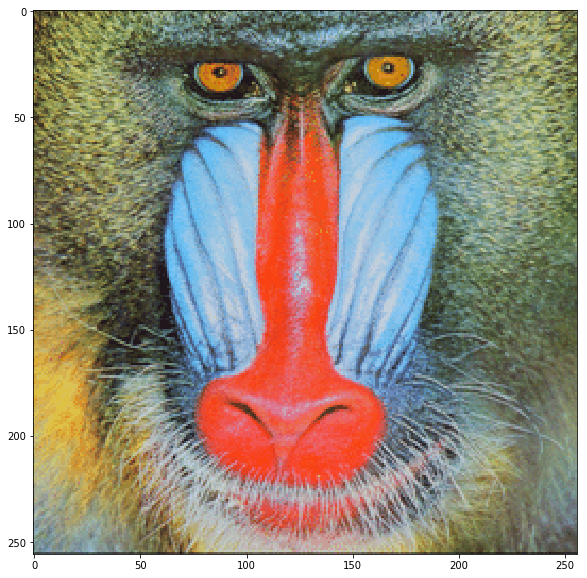

In [504]:
pyplot.figure(figsize=(10,10))
pyplot.imshow(image)

In [505]:
def normalize(image):
    return (image - np.min(image)) / (np.max(image) - np.min(image))

In [506]:
def show_images(I0, I1):
    pyplot.figure(figsize=(20,20))
    pyplot.subplot(1,2,1)
    pyplot.imshow(I0, cmap="Greys_r")
    pyplot.subplot(1,2,2)
    pyplot.imshow(I1, cmap="Greys_r")

# Interpolation Methods

![image](https://upload.wikimedia.org/wikipedia/commons/9/90/Comparison_of_1D_and_2D_interpolation.svg)

### Nearest Neighbor

Each pixel receives the value of the closest pixel. Note that we need a tie-breaking criteria in some cases.

![nearest_neighbor](http://tech-algorithm.com/uploads/nneighbor01.png)

### Bilinear Interpolation

Linearly interpolating between two points $p_1$ and $p_2$ can be defined by the following:

$$p_1x + (1-x)p_2$$

for $x\in [0,1]$. 

When considering a two dimensional image, we can use three interpolations to find a new pixel value, as shown in the image above.

Thus, for a set of four pixel intensities

$$\left(\begin{array}{cc}p_{11}&p_{12}\\p_{21}&p_{22}\end{array}\right)$$

we can use the two interpolation functions

$$f_1(x) = p_{11}x + (1-x)p_{12}$$
$$f_2(x) = p_{21}x + (1-x)p_{22}$$

and then interpolate between these lines via

$$f(x,y) = f_1(x)y + (1-y)f_2(x)$$

to define the value at any point in the region $[0,1]\times[0,1]$

### Bicubic Interpolation

This method uses a $4\times 4$ neighborhood of pixels to build a cubic interpolation. In particular, we set

$$f(x,y) = \sum_{i=0}^3\sum_{j=0}^3 a_{ij}x^iy^j$$

The sixteen coefficients $(a_{ij})$ are determined using the image intensity values $I$ as well the first and second order gradients $I_x$, $I_y$, and $I_{xy}$.

The formula for these coefficients can be found easily online.

The partial derivatives $I_x$ and $I_y$ are determined simply by

$$I_x(i,j) = \frac{I(i+1,j) - I(i-1,j)}{2}$$

$$I_y(i,j) = \frac{I(i,j+1) - I(i,j-1)}{2}$$

Then $I_{xy}$ is given by

$$I_{xy} = \frac{I_x(i, j+1) - I_x(i,j-1)}{2}$$

### Other Methods

<li>Sinc Resampling</li>
<li>Lanczos Resampling</li>
<li>Box Sampling</li>
<li>Mipmap</li>
<li>Fourier Transform Methods</li>

# Image Filtering

## Convolutions

The convolution $f*g$ of two functions $f,g$ defined on $\mathbb{R}^d$ is given by

$$(f*g)(x) = \int_{\mathbb{R}^d}f(y)g(x-y)dy$$

if the integral exists.

However, we will use the discrete convolution

$$(f*g)(n) = \sum_{m=-\infty}^\infty f(m)g(n-m)$$

and in two dimensions

$$(f*g)(n,m) = \sum_{i=-\infty}^\infty\sum_{j=-\infty}^\infty f(i,j)g(n-i,m-j)$$

## Scipy Convolutions

The Scipy convolution operation performs the convolution across the entire image tensor. We only want to apply the convolutions by band.

In [508]:
K = np.ones(shape=(3,3,3)) / 27
I = convolve(image, K, mode="reflect")

In [509]:
show_images(image, I)

We will define a function which applys the convolution to each band independently

In [510]:
def convolve2D(img, K):
    C = np.zeros(shape=image.shape)
    for band in range(3):
        C[:,:,band] = convolve(img[:,:,band], K, mode="reflect")
    return C

#### Padding

The are various ways to deal with the boundary of an image. This is known as the padding strategy.

<li>Reflection: Values are reflected over the boundary to fill the kernel.</li>
<li>Constant Valued: Use the same value whenever out of bounds.</li>
<li>Nearest Neighbor: Nearest boundary value is repeated to fill the kernel.</li>
<li>Wrap: Extends input beyond the boundary by using values from the opposite side.</li>

In [520]:
K = np.ones(shape=(3,3,3)) / 27
I = convolve(image, K, mode="reflect", cval=0)

In [521]:
show_images(image, I)

In [522]:
K = np.ones(shape=(3,3,3)) / 27
I = convolve(image, K, mode="wrap")

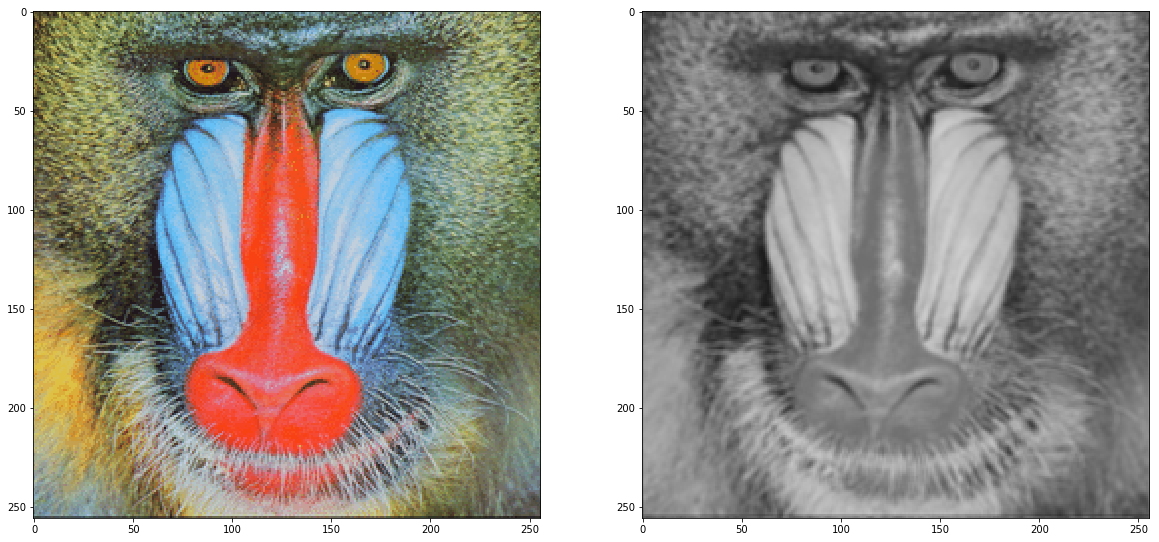

In [523]:
show_images(image, I)

### Average Filter (Box Blur)

Now we can apply proper blurring with the kernel:

<center>
    $\large K=\frac{1}{9}\cdot\left(\begin{array}{ccc}1&1&1\\1&1&1\\1&1&1\end{array}\right)$
</center>

In [526]:
K = np.ones(shape=(5,5)) / 25
I = convolve2D(image, K)

In [527]:
show_images(image, I)

### Gaussian Filter

Uses a discrete Gaussian filter via the equation:

$$\large G(x,y) = \frac{1}{2\pi\sigma^2}\exp^{-\frac{x^2+y^2}{2\sigma^2}}$$

In [528]:
def GaussianKernel(size, sigma):
    K = np.zeros((size, size))
    
    r = (size - 1) // 2
    
    for i in range(0, size):
        for j in range(0, size):
            x, y = i - r, j - r
            K[i,j] = 1 / (2 * np.pi * sigma**2) * np.exp(-1 * (x**2 + y**2) / (2 * sigma**2))
      
    # Must normalize since the matrix is finite but the support of the Gaussian is infinite
    K /= np.sum(K)
    return K

In [529]:
K = GaussianKernel(3, 1)

In [530]:
I = convolve2D(image, K)

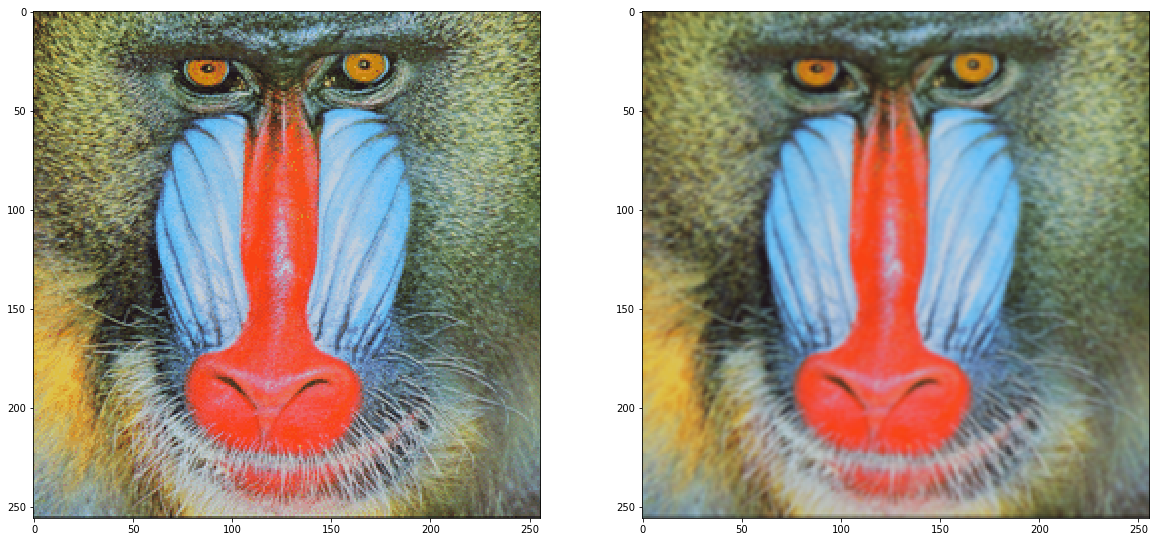

In [531]:
show_images(image, I)

### Sharpening Filter

We can sharpen using the following filter:

$$\large K = \left[\begin{array}{ccc}0&-1&0\\-1&5&-1\\0&-1&0\end{array}\right]$$

In [532]:
K = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

In [533]:
I = convolve2D(image, K)

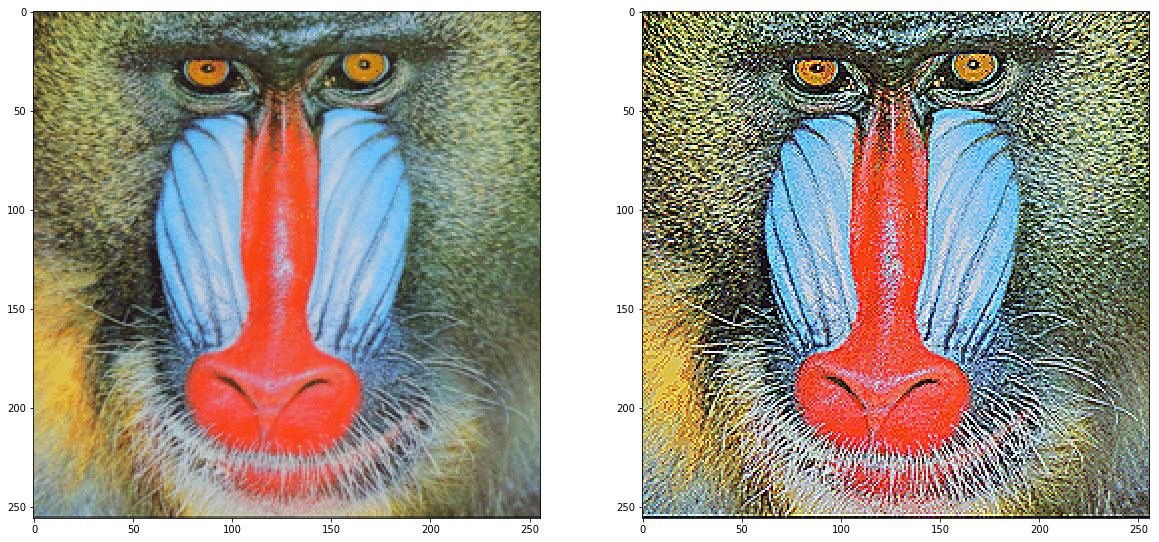

In [534]:
show_images(image, np.clip(I, 0, 1))

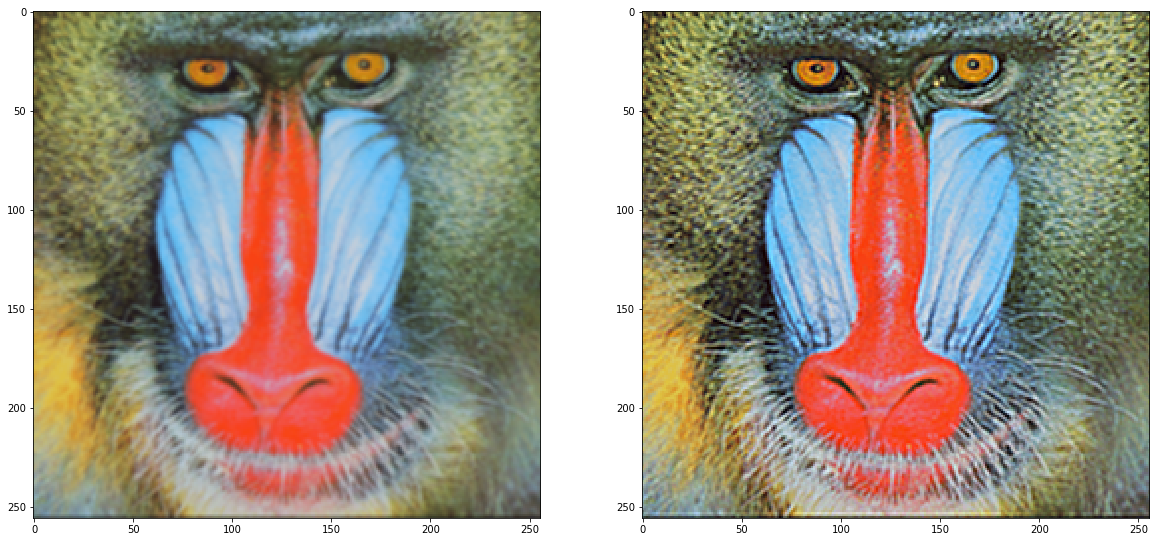

In [535]:
G = GaussianKernel(3, 1)
IG = convolve2D(image, G)
I = convolve2D(IG, K)
show_images(IG, np.clip(I, 0, 1))

### Gradient Filter

Here we use two filters, one for each direction.

The first filter handles the left-right gradient
$$\large G_x=\left[\begin{array}{ccc}0&0&0\\-1&0&+1\\0&0&0\end{array}\right]$$

The second filter handles the up-down gradient
$$\large G_y=\left[\begin{array}{ccc}0&-1&0\\0&0&0\\0&+1&0\end{array}\right]$$

For this example, we will convert the image to greyscale.

In [536]:
bw = np.mean(image, axis=-1)

show_images(image, bw)

In [538]:
Dx = np.array([[0, 0, 0], [-1,0,1], [0,0,0]])
Dy = np.array([[0,-1, 0], [0,0,0], [0,1,0]])

In [539]:
Ix = convolve(bw, Dx)
Iy = convolve(bw, Dy)

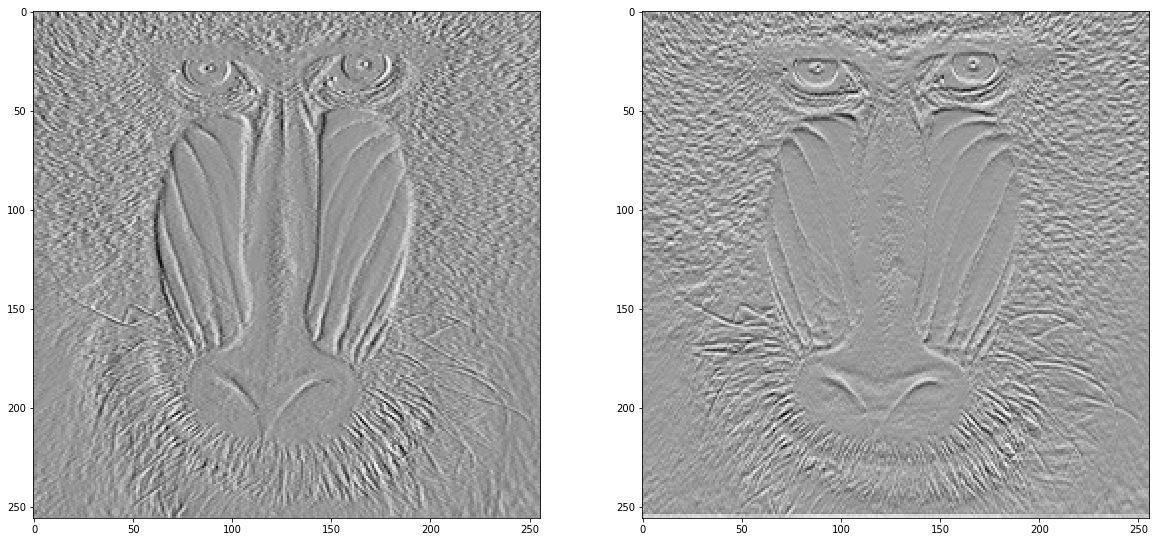

In [540]:
show_images(Ix, Iy)

### Sobel Filter (Edge Detection)

Here we use two filters, known as Sobel or Sobel-Feldman filters.

The first filter handles the left-right edge detection
$$\large G_x=\left[\begin{array}{ccc}-1&0&+1\\-2&0&+2\\-1&0&+1\end{array}\right]$$

The second filter handles the up-down edge detection
$$\large G_y=\left[\begin{array}{ccc}-1&-2&-1\\0&0&0\\+1&+2&+1\end{array}\right]$$

Note that we can decompose $G_x*I$ for an image $I$ as:

$$\large G_x = \left[\begin{array}{c}1\\2\\1\end{array}\right] * \left([\begin{array}{ccc}-1&0&+1\end{array}]* I\right)$$

and similarly for $G_y * I$. Therefore, the Sobel operator can be seen as smoothed gradient detection.

In [541]:
Gx = np.array([[-1,0,1], [-2,0,2], [-1,0,1]])
Gy = np.array([[-1,-2,-1], [0,0,0], [1,2,1]])

In [542]:
Ix = convolve(bw, Gx)
Iy = convolve(bw, Gy)

In [543]:
show_images(image, Ix)

In [544]:
show_images(image, Iy)

In [545]:
edges = np.sqrt(Ix**2 + Iy**2)

In [546]:
show_images(image, edges)

# Image Restoration

In [547]:
from skimage.restoration import denoise_bilateral, denoise_tv_chambolle
from skimage.util import random_noise

In [549]:
sigma = 0.1
image_noisy = random_noise(image, var=sigma**2)

### Bilateral Filtering

The bilateral filter is defined as

$$I_f(x) = \frac{1}{W_p}\sum_{x_i\in\Omega}I(x_i)f_r(\|I(x_i)-I(x)\|)g_s(\|x_i-x\|)$$

where

<li>$I_f$ is the filtered image</li>
<li>$I$ is the original input image</li>
<li>$x$ is the coordinte of the current pixel</li>
<li>$\Omega$ is the window centered around $x$</li>
<li>$f_r$ is the range kernel for smoothing differences in intensities</li>
<li>$g_s$ is the spatial kernel for smoothing differences in coordinates</li>

In [550]:
I = denoise_bilateral(image_noisy, sigma_color=0.05, sigma_spatial=15, multichannel=True)

In [551]:
show_images(image_noisy, I)

### Total Variation Denoising

Define the total variation norm of an image $I$ as

$$V(I) = \sum_{i,j}\sqrt{|I(i+1,j) - I(i,j)|^2 + |I(i,j+1)-I(i,j)|^2}$$

Then the total variation denoising problem is given by

$$\min_{J} E(I,J) + \lambda V(J)$$

where $E$ is the two-dimensional $L^2$ norm. A primal-dual method can be used to solve this problem.

In [552]:
I = denoise_tv_chambolle(image_noisy, weight=0.05, multichannel=True)

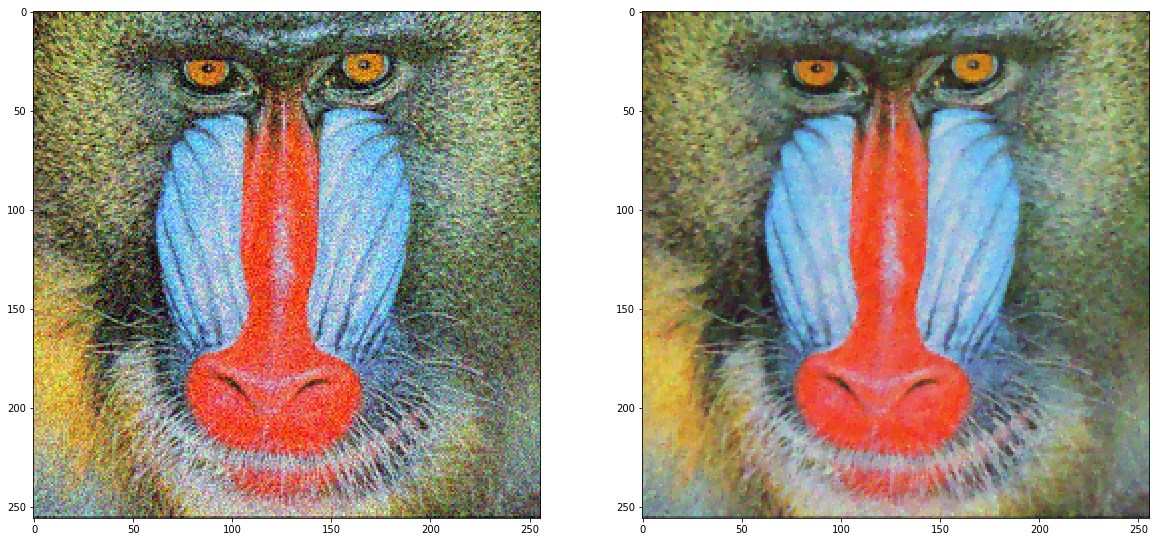

In [553]:
show_images(image_noisy, I)

# Fourier Analysis

## The Fourier Transform

The Fourier transform $\hat{f}$ of an integrable function $f:\mathbb{R}\rightarrow \mathbb{C}$ is given by

$$\hat{f}(\xi) = \int_{-\infty}^\infty f(x)e^{-2\pi i x\xi}dx$$

and the inverse Fourier transform is given by

$$f(x) = \int_{-\infty}^\infty \hat{f}(\xi)e^{2\pi i \xi}d\xi$$

## The Discrete Fourier Transform

The discrete Fourier transform is given by

<center>
    $$F(u,v) = \frac{1}{NM}\sum_{n=1}^N\sum_{m=1}^M f(n, m) e^{-2\pi i \left(\frac{un}{N}+\frac{vm}{M}\right)}$$
</center>

and the inverse Fourier transform is given by

<center>
    $$f(n,m) = \sum_{u=1}^N\sum_{v=1}^M F(u,v) e^{2\pi i \left(\frac{un}{N} + \frac{vm}{N}\right)}$$
</center>

Note that

$$g(n,m) = h(n,m)*f(n,m) \Leftrightarrow G(u,v)=H(u,v)F(u,v)$$

Thus, convolutions in the spatial domain are equivalent to pointwise multiplication in the frequency domain.

In [554]:
from scipy.fftpack import fft2, ifft2, fftshift, ifftshift
from matplotlib.colors import LogNorm

In [555]:
def generate_horizontal(theta):    
    I = np.array([np.sin(theta * i/np.pi) for i in np.linspace(0, np.pi, 256)])
    return np.stack([I]*256)

In [556]:
def generate_vertical(theta):    
    return generate_horizontal(theta).T

In [557]:
def generate_circle():
    I = np.zeros((256,256))
    for i in range(256):
        for j in range(256):
            I[i,j] = 0 if ((i-128)/256)**2 + ((j-128)/256)**2 < 0.125 else 1
    return I

In [558]:
def generate_square():
    I = np.zeros((256,256))
    for i in range(256):
        for j in range(256):
            if 256/4 <= i < 3*256/4 and 256/4 <= j < 3*256/4:
                I[i,j] = 1
            else:
                I[i,j] = 0
    return I

In [582]:
#I = generate_horizontal(200)
#I = generate_vertical(100)
#I = generate_horizontal(100) + generate_vertical(100)
#I = generate_circle()
I = generate_square()

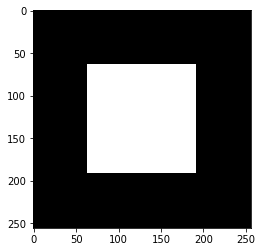

In [583]:
pyplot.imshow(I, cmap="Greys_r")

In [584]:
F = fft2(I)

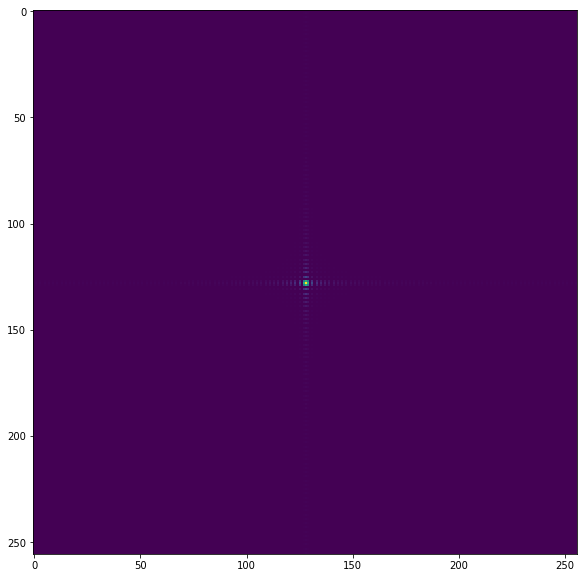

In [585]:
pyplot.figure(figsize=(10,10))
pyplot.imshow(np.abs(fftshift(F)))

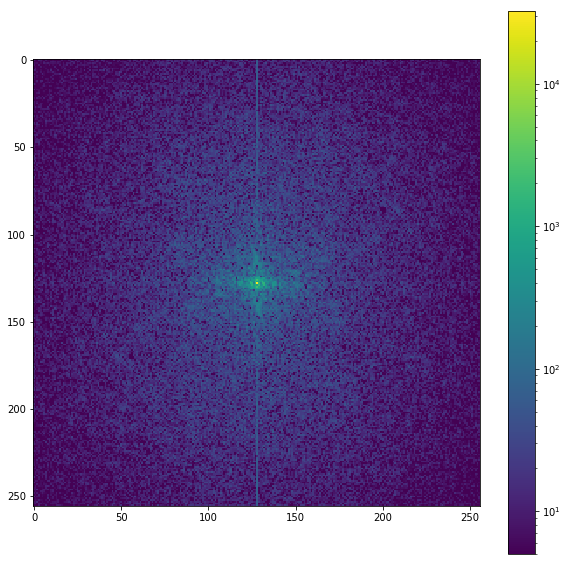

In [586]:
F = fft2(bw)

pyplot.figure(figsize=(10,10))
pyplot.imshow(np.abs(fftshift(F)), norm=LogNorm(vmin=5))
pyplot.colorbar()

## Image Compression

In [587]:
Fs = fftshift(F)

In [593]:
for i in range(256):
    for j in range(256):
        if ((i-128)/128)**2 +((j-128)/128)**2 > 0.25:
            Fs[i,j] = 0

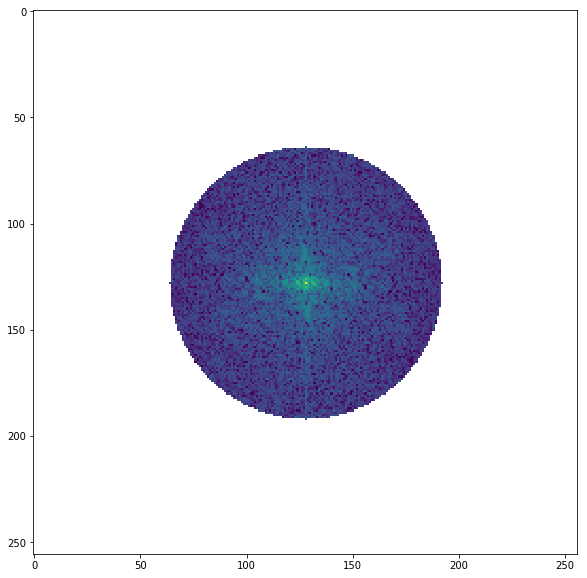

In [594]:
pyplot.figure(figsize=(10,10))
pyplot.imshow(np.abs(Fs), norm=LogNorm(vmin=5))

In [595]:
F = ifftshift(Fs)

In [596]:
I = ifft2(F)

In [597]:
pyplot.figure(figsize=(10,10))
show_images(bw, np.abs(I))

<Figure size 720x720 with 0 Axes>

# Segmentation

## Watershed

In [598]:
from skimage.morphology import watershed
from scipy import ndimage as ndi
from skimage.feature import peak_local_max

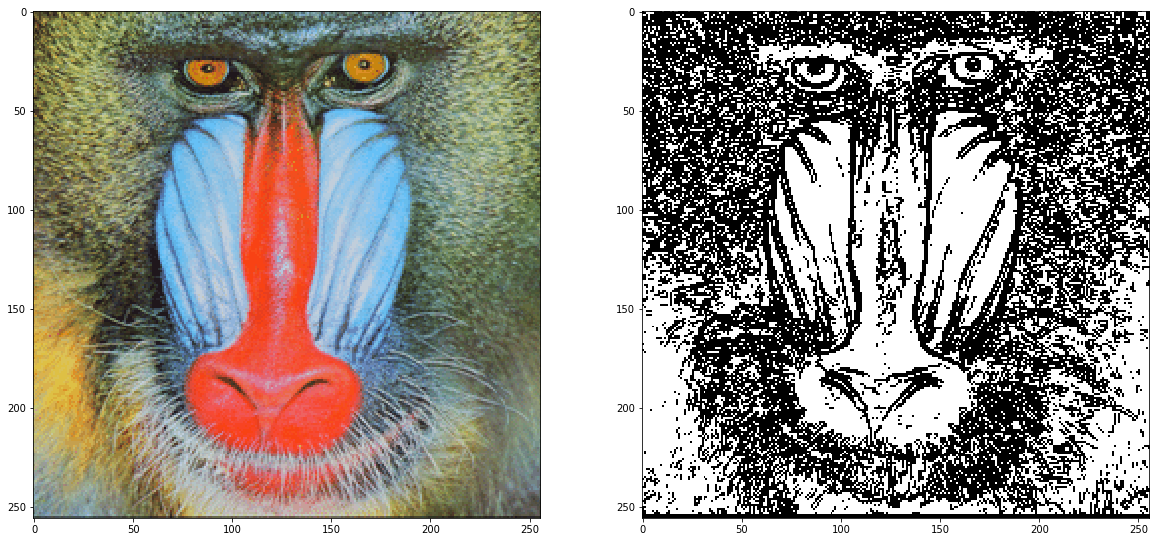

In [599]:
show_images(image, edges<0.3)

In [600]:
# Take the significant edges
E = (edges < 0.3)

In [601]:
# Compute the distance to the edges
distance = ndi.distance_transform_edt(E)

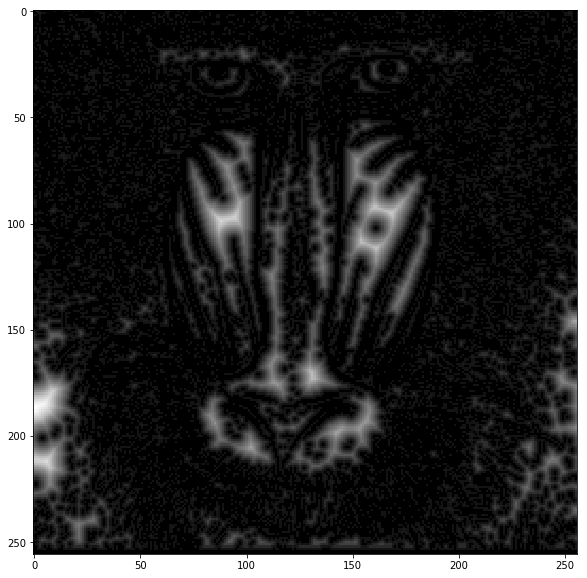

In [602]:
pyplot.figure(figsize=(10,10))
pyplot.imshow(distance, cmap="Greys_r")

In [603]:
# Identify the local maxima
k = 40

local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((k, k)),
                            labels=E)

In [604]:
# Flag the maxima in an array
markers = ndi.label(local_maxi)[0]

In [605]:
pyplot.figure(figsize=(10,10))
pyplot.imshow(markers)

In [606]:
# Perform the watershed algorithm
labels = watershed(distance, markers, mask=E)

Text(0.5, 1.0, 'Separated objects')

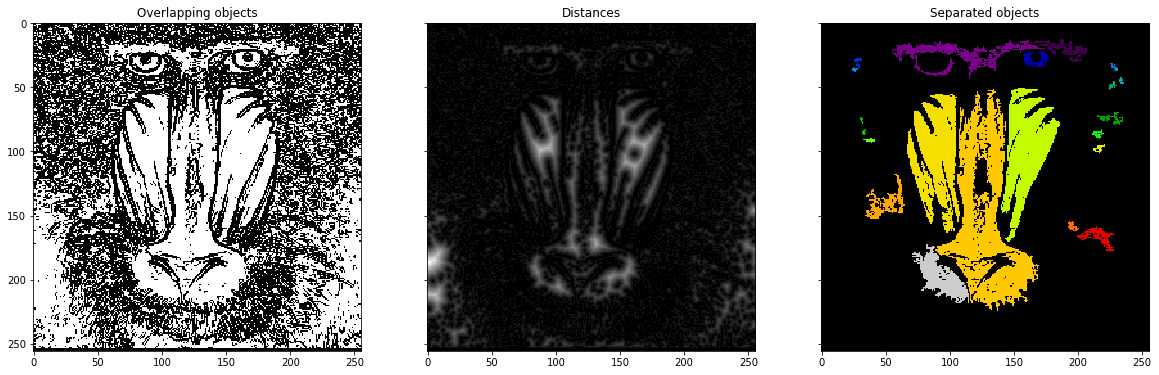

In [607]:
fig, axes = pyplot.subplots(ncols=3, figsize=(20, 20), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(E, cmap=pyplot.cm.gray, interpolation='nearest')
ax[0].set_title('Overlapping objects')
ax[1].imshow(distance, cmap=pyplot.cm.gray, interpolation='nearest')
ax[1].set_title('Distances')
ax[2].imshow(labels, cmap=pyplot.cm.nipy_spectral, interpolation='nearest')
ax[2].set_title('Separated objects')